<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/mannWhitney_between_sites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparative analysis of bacterial counts between site pairs for each sea water and sand

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('adjusted_data.csv')
# print(data.head())
# List of bacterial columns
bacterial_cols = [
    'BC-Enterococcus (CFU/100ml)',
    'BC-Fecal Coliform(CFU/100ml)',
    'BC-E-Coli (CFU/100ml)'
]

# List of sites
sites = ['Site 1', 'Site 2', 'Site 3']
site_pairs = [('Site 1', 'Site 2'), ('Site 1', 'Site 3'), ('Site 2', 'Site 3')]
areas = ['Sea Water', 'Sand']

# to store results
results = []

###Perform Mann-Whitney U tests for each combination

U Statistic: The test statistic - larger values indicate more separation between groups\
p-value: Probability that the observed difference occurred by chance\
p < 0.05: Statistically significant difference between sites\
p ≥ 0.05: No statistically significant difference

In [ ]:
for area in areas:
    for site1, site2 in site_pairs:
        for bacteria in bacterial_cols:
            # Filter data for the current area and sites
            data1 = df[(df['Site'] == site1) & (df['Area'] == area)][bacteria]
            data2 = df[(df['Site'] == site2) & (df['Area'] == area)][bacteria]

            # Perform Mann-Whitney U test
            stat, p = mannwhitneyu(data1, data2, alternative='two-sided')

            # Determine significance
            significance = "Significant" if p < 0.05 else "Not significant"

            # Store results
            results.append({
                'Area': area,
                'Site Pair': f"{site1} vs {site2}",
                'Bacteria': bacteria,
                'U Statistic': stat,
                'p-value': p,
                'Significance': significance
            })

# convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

     Area        Site Pair                     Bacteria  U Statistic  p-value    Significance
Sea Water Site 1 vs Site 2  BC-Enterococcus (CFU/100ml)         68.0 0.185877 Not significant
Sea Water Site 1 vs Site 2 BC-Fecal Coliform(CFU/100ml)         66.0 0.241322 Not significant
Sea Water Site 1 vs Site 2        BC-E-Coli (CFU/100ml)         69.0 0.161815 Not significant
Sea Water Site 1 vs Site 3  BC-Enterococcus (CFU/100ml)         40.0 0.472676 Not significant
Sea Water Site 1 vs Site 3 BC-Fecal Coliform(CFU/100ml)         37.0 0.344704 Not significant
Sea Water Site 1 vs Site 3        BC-E-Coli (CFU/100ml)         34.0 0.240790 Not significant
Sea Water Site 2 vs Site 3  BC-Enterococcus (CFU/100ml)         31.0 0.161972 Not significant
Sea Water Site 2 vs Site 3 BC-Fecal Coliform(CFU/100ml)         24.0 0.053903 Not significant
Sea Water Site 2 vs Site 3        BC-E-Coli (CFU/100ml)         27.5 0.095928 Not significant
     Sand Site 1 vs Site 2  BC-Enterococcus (CFU/100ml)     

###Visualization

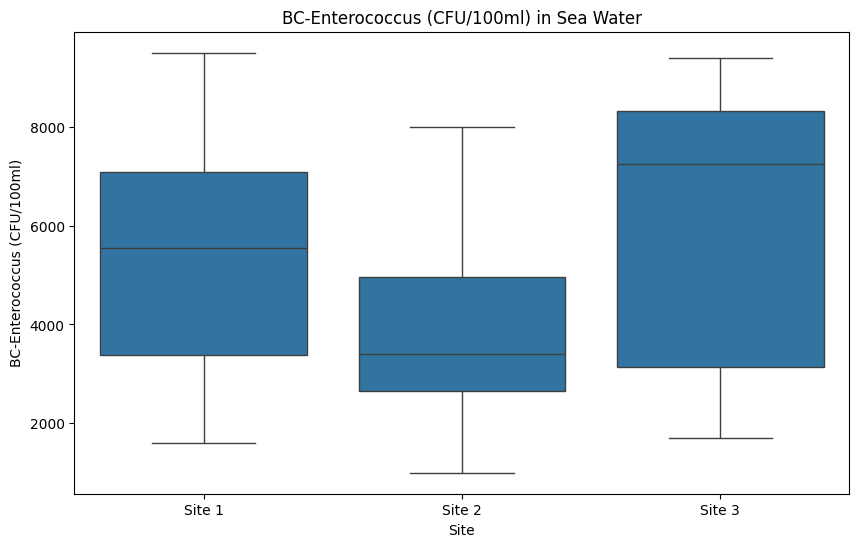

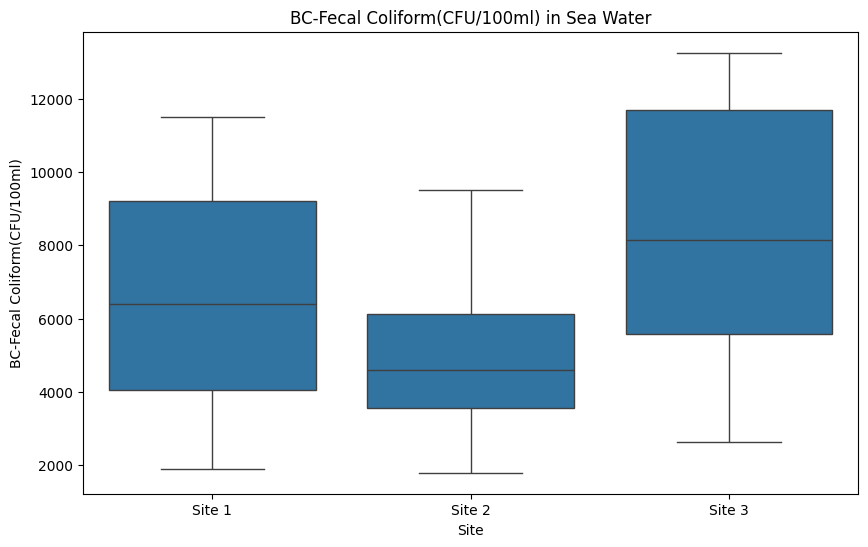

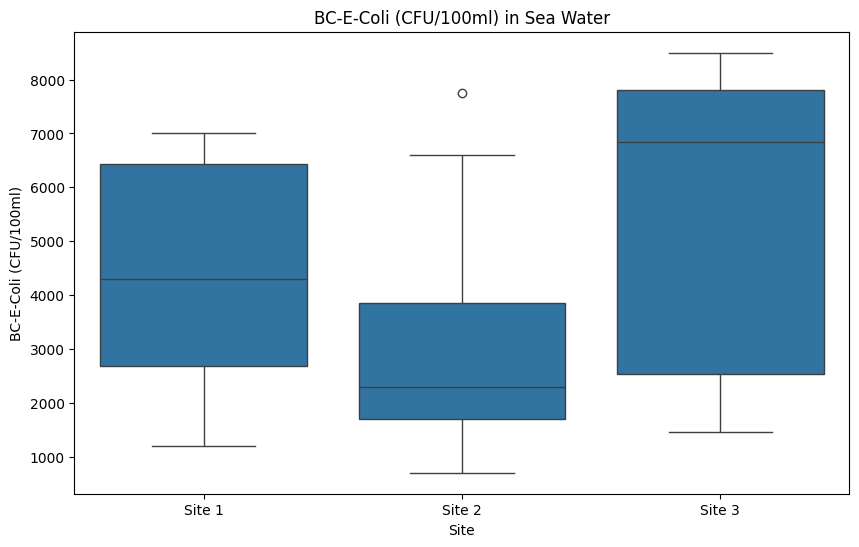

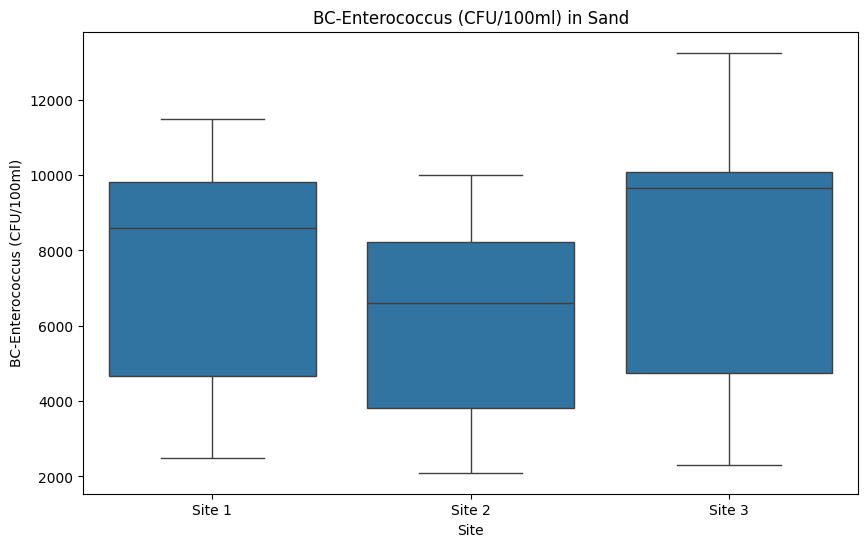

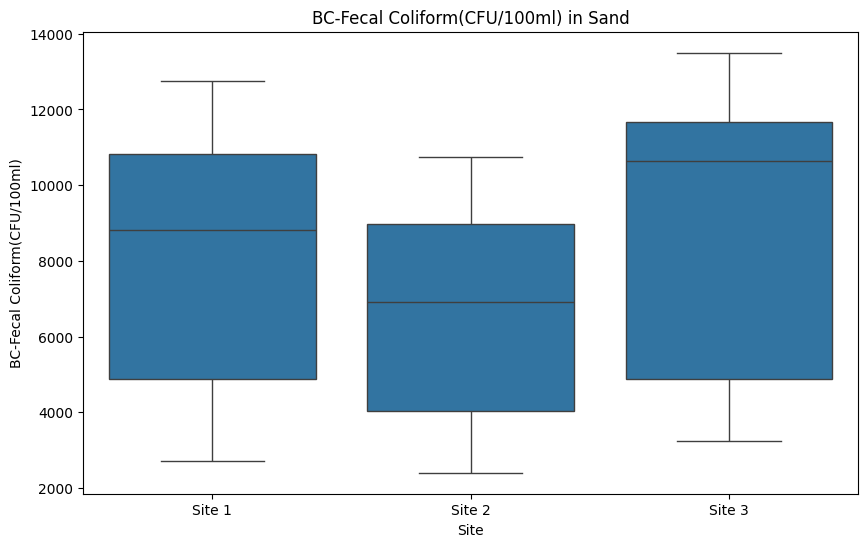

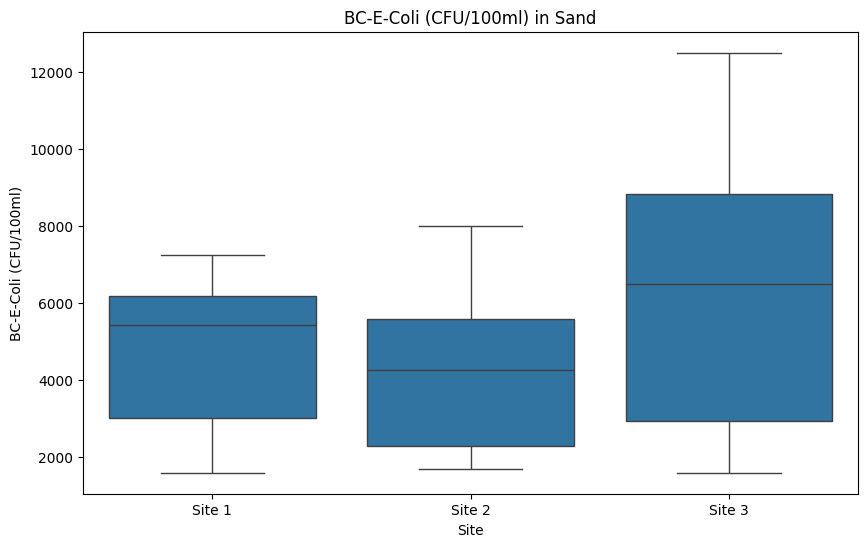

In [ ]:
for area in areas:
    for bacteria in bacterial_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[df['Area'] == area], x='Site', y=bacteria)
        plt.title(f'{bacteria} in {area}')
        plt.show()

##Additional calculations for more effective results

###Multiple Testing Correction

In [ ]:
#Bonferroni correction: statistical method used to adjust p-values when performing multiple hypothesis tests to reduce the risk of false positives (Type I errors)
alpha = 0.05
n_tests = len(site_pairs) * len(bacterial_cols) * len(areas)
corrected_alpha = alpha / n_tests
print(corrected_alpha)
#compare p-values to corrected_alpha instead of 0.05

0.002777777777777778
